In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
import seaborn as sns

In [17]:
pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력

In [18]:
#각 연도별 집계구 데이터 불러오기

code_11 = pd.read_csv('./code_data/code_2011.csv',encoding='EUC-KR')
code_12 = pd.read_csv('./code_data/code_2012.csv',encoding='EUC-KR')
code_13 = pd.read_csv('./code_data/code_2013.csv',encoding='EUC-KR')
code_14 = pd.read_csv('./code_data/code_2014.csv',encoding='EUC-KR')
code_15 = pd.read_csv('./code_data/code_2015.csv',encoding='EUC-KR')
code_16 = pd.read_csv('./code_data/code_2016.csv',encoding='EUC-KR')
code_17 = pd.read_csv('./code_data/code_2017.csv',encoding='EUC-KR')
code_18 = pd.read_csv('./code_data/code_2018.csv',encoding='EUC-KR')
code_19 = pd.read_csv('./code_data/code_2019.csv',encoding='EUC-KR')
code_20 = pd.read_csv('./code_data/code_2020.csv',encoding='EUC-KR')

code_list = [code_11,code_12,code_13,code_14,code_15,code_16,code_17,code_18,code_19,code_20]


In [19]:
#화재발생 수치로 데이터셋 만들기

sub = pd.concat(code_list,axis=0)
sub = sub.reset_index()
sub = sub.drop(['index','Unnamed: 0','cp_bnu_999',],axis=1)
sub['fire_count'].fillna(0,inplace=True)

In [20]:
sub = pd.concat(code_list,axis=0)
sub = sub.reset_index()
sub = sub.drop(['index','Unnamed: 0','ori_index','qu_se','cp_bnu_999',],axis=1)
sub.loc[sub['fire_count'] >= 1,'fire_count'] = 'Y'
sub['fire_count'].fillna('N',inplace=True)


In [21]:
sub.head(15)

,code,total_pop,avg_age,pop_dens,eld_dep_ratio,total_house,ho_ar_001,ho_ar_002,ho_ar_003,ho_ar_004,ho_ar_005,ho_ar_006,ho_ar_007,ho_ar_008,ho_ar_009,ho_ar_999,1970s,1980s,1990s,2000-2004,2005-2009,2010-2014,2015-2020,no_yr_data,ho_gb_001,ho_gb_002,ho_gb_003,ho_gb_004,ho_gb_005,ho_gb_006,ho_gb_999,total_corp,cp_bnu_001,cp_bnu_002,cp_bnu_003,cp_bnu_004,cp_bnu_005,cp_bnu_006,cp_bnu_007,cp_bnu_008,cp_bnu_009,cp_bnu_010,cp_bnu_011,cp_bnu_012,cp_bnu_013,cp_bnu_014,cp_bnu_015,cp_bnu_016,cp_bnu_017,cp_bnu_018,cp_bnu_019,cp_bem_001,cp_bem_002,cp_bem_003,cp_bem_004,cp_bem_005,cp_bem_006,cp_bem_007,cp_bem_008,cp_bem_009,cp_bem_010,cp_bem_011,cp_bem_012,cp_bem_013,cp_bem_014,cp_bem_015,cp_bem_016,cp_bem_017,cp_bem_018,cp_bem_019,cp_bem_999,do_index,si_index,dong_index,si_name,dong_name,year,season,city0,year0,avg_temp(℃)0,avg_high_temp(℃)0,avg_low_temp(℃)0,avg_hum(%rh)0,rain(mm)0,avg_wind(m/s)0,max_wind(m/s)0,month0,avg_temp(℃)1,avg_high_temp(℃)1,avg_low_temp(℃)1,avg_hum(%rh)1,rain(mm)1,avg_wind(m/s)1,max_wind(m/s)1,month1,avg_temp(℃)2,avg_high_temp(℃)2,avg_low_temp(℃)2,avg_hum(%rh)2,rain(mm)2,avg_wind(m/s)2,max_wind(m/s)2,month2,fire_count
0,35011600010001,597,42.8,10347.1,143.0,169,0.0,0.0,5.0,51.0,36.0,25.0,33.0,12.0,0.0,0.0,95.0,27.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,21,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,N
1,35011600010002,884,42.9,3981.5,211.8,230,0.0,7.0,19.0,66.0,37.0,29.0,44.0,18.0,9.0,0.0,116.0,26.0,17.0,0.0,9.0,0.0,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,78.0,0.0,0.0,0.0,0.0,21.0,15.0,0.0,5.0,7.0,24.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,Y
2,35011600010003,889,28.6,6742.7,276.5,82,0.0,0.0,8.0,26.0,6.0,11.0,8.0,13.0,9.0,0.0,42.0,0.0,0.0,15.0,23.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,0.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,114.0,9.0,0.0,13.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,N
3,35011600020001,556,43.6,721.5,132.1,174,0.0,6.0,32.0,82.0,22.0,11.0,12.0,8.0,0.0,0.0,26.0,32.0,81.0,5.0,0.0,0.0,0.0,0.0,0.0,101.0,70.0,0.0,0.0,0.0,0.0,51,0.0,0.0,9.0,0.0,0.0,6.0,17.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,47.0,52.0,7.0,17.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,5.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,N
4,35011600020002,550,45.7,136.9,208.8,217,0.0,6.0,85.0,46.0,39.0,15.0,14.0,5.0,7.0,0.0,39.0,30.0,96.0,10.0,0.0,0.0,0.0,0.0,0.0,119.0,70.0,27.0,0.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,17.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,9.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,N
5,35011600020003,445,54.5,117.3,485.7,138,0.0,10.0,26.0,42.0,31.0,11.0,18.0,0.0,0.0,0.0,44.0,14.0,33.0,10.0,12.0,0.0,0.0,0.0,10.0,127.0,0.0,0.0,0.0,6.0,0.0,36,0.0,0.0,5.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0,0.0,0.0,21.0,0.0,0.0,17.0,35.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,17.0,56.0,0.0,7.0,0.0,35,11,600,전주,동서학동,11,1,전주,11,-4.9,0.2,-13.4,63,4.5,1.8,7.5,1,2.1,8.1,-9.7,68,58.4,1.5,8.5,2,1.1,5.5,-9.3,63,10.5,1.6,6.4,12,N
6,35011600020004,704,43.7,5274.2,171.3,227,0.0,8.0,22.0,111.0,42.0,20.0,17.0,6.0,0.0,0.0,66.0,30.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0,24.0,26.0,0.0,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0

<Axes: >

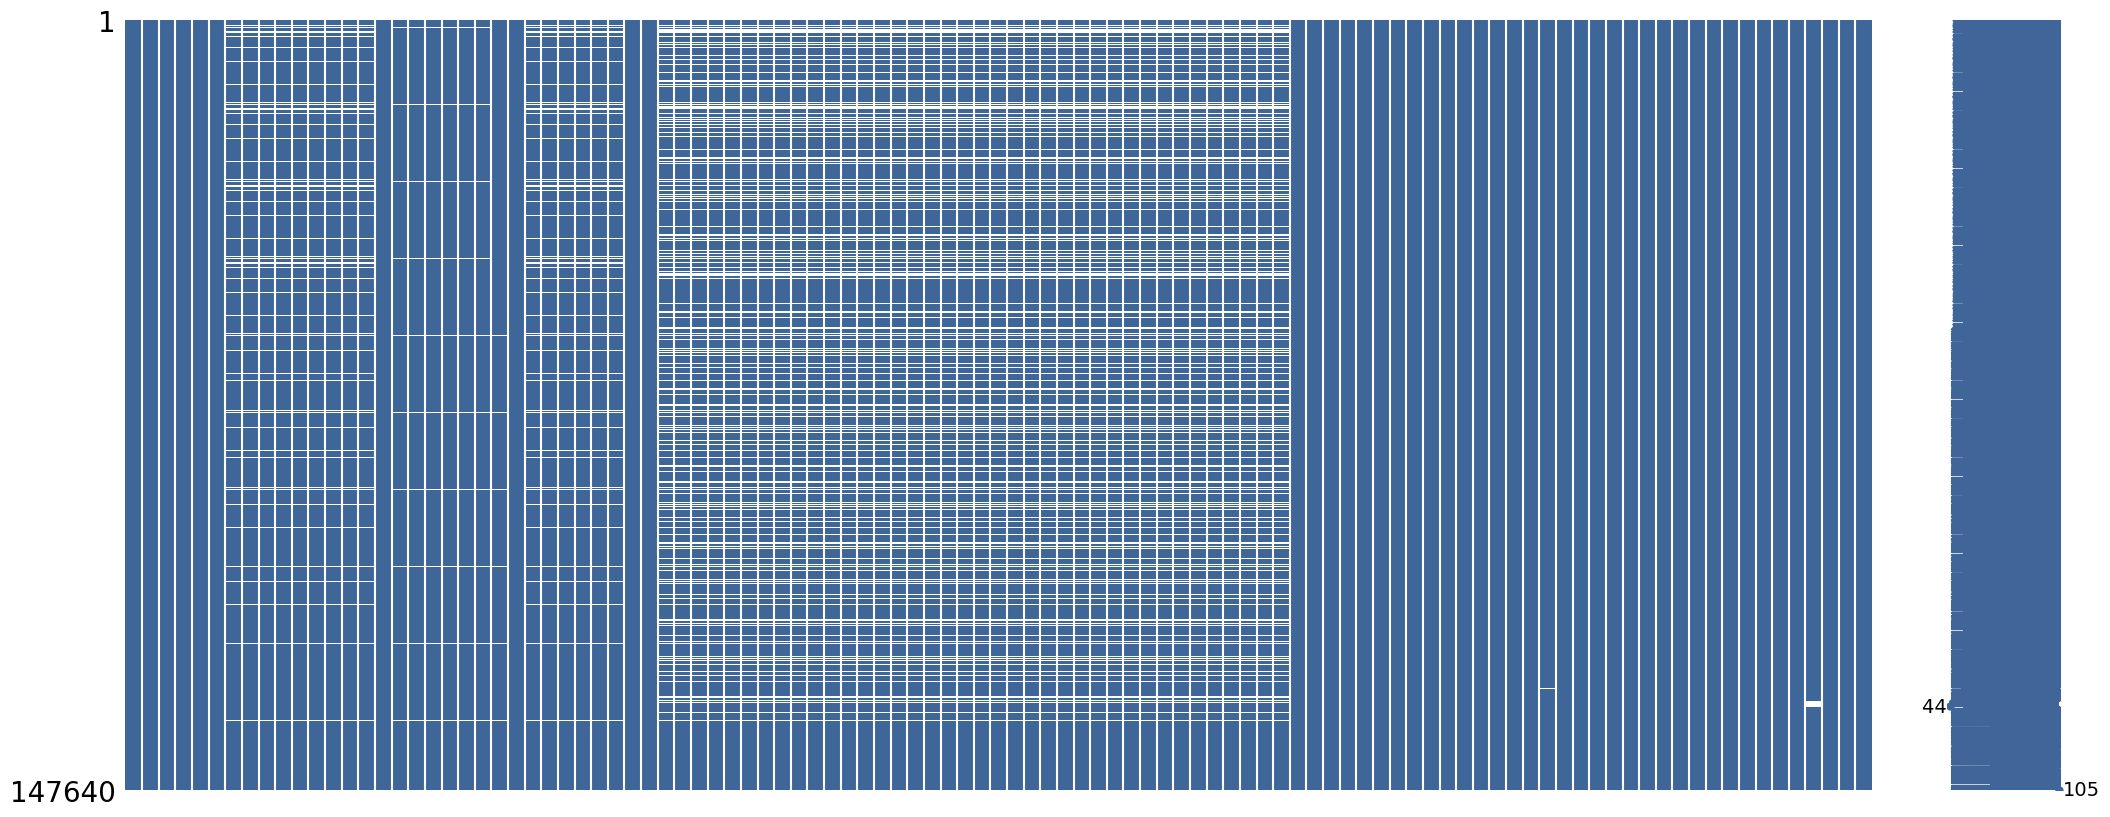

In [22]:
mn.matrix(sub,color =(0.25,0.4,0.6))

### 연도별 화재 발생 비율

In [23]:
#1-1) 지역별(대단위) 화재 비율
print('전체 화재 비율: {}'.format(round(sub[(sub.fire_count =='Y')].fire_count.count() / sub.fire_count.count(),2)))
print('11년 화재 비율: {}'.format(round(sub[(sub.year == 11)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 11].fire_count.count(), 4)))
print('12년 화재 비율: {}'.format(round(sub[(sub.year == 12)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 12].fire_count.count(), 4)))
print('13년 화재 비율: {}'.format(round(sub[(sub.year == 13)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 13].fire_count.count(), 4)))
print('14년 화재 비율: {}'.format(round(sub[(sub.year == 14)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 14].fire_count.count(), 4)))
print('15년 화재 비율: {}'.format(round(sub[(sub.year == 15)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 15].fire_count.count(), 4)))
print('16년 화재 비율: {}'.format(round(sub[(sub.year == 16)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 16].fire_count.count(), 4)))
print('17년 화재 비율: {}'.format(round(sub[(sub.year == 17)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 17].fire_count.count(), 4)))
print('18년 화재 비율: {}'.format(round(sub[(sub.year == 18)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 18].fire_count.count(), 4)))
print('19년 화재 비율: {}'.format(round(sub[(sub.year == 19)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 19].fire_count.count(), 4)))
print('20년 화재 비율: {}'.format(round(sub[(sub.year == 20)&(sub.fire_count=='Y')].fire_count.count() / sub[sub.year == 20].fire_count.count(), 4)))

전체 화재 비율: 0.07
11년 화재 비율: 0.0604
12년 화재 비율: 0.0554
13년 화재 비율: 0.0552
14년 화재 비율: 0.056
15년 화재 비율: 0.0671
16년 화재 비율: 0.073
17년 화재 비율: 0.0765
18년 화재 비율: 0.0808
19년 화재 비율: 0.082
20년 화재 비율: 0.0839


### 총 화재 발생 건수

In [24]:
print('10년간 화재 발생 횟수 : ',sub[(sub.fire_count =='Y')].fire_count.count())
print('총 행수:', sub.fire_count.count())

10년간 화재 발생 횟수 :  10192
총 행수: 147640


### 각 변수의 결측치 비율과 결측치에서 실제 화재가 발생한 비율

In [25]:
#1-2) 컬럼 Missing Value 비율 & 해당 컬럼 Missing Value 의 화재확률
# Missing Value DataFrame

mis = np.array(sub.drop(['code'],1).columns)
mis_val = np.array((147649 - sub.drop(['code'],1).count().values) / 147640)
miss_df = pd.DataFrame()
miss_df['cols'] = mis
miss_df['mis_val_ratio'] = mis_val

lis = []
for i in list(mis):
    fr_ratio = sub[(sub[i].isnull())&(sub.fire_count == 'Y')].fire_count.count() / sub[sub[i].isnull()].fire_count.count()
    lis.append(fr_ratio)
    
lis = pd.Series(lis).map(lambda x : 0 if str(x)=='nan' else x).values
miss_df['mis_val_fr_ratio']=lis
miss_df = miss_df.sort_values(by='mis_val_fr_ratio',ascending=False)
miss_df = miss_df[miss_df.mis_val_ratio != 0].sort_values(by='mis_val_ratio',ascending=False)
mis_cols = np.array(miss_df['cols'])
mis_val_fr_ratio = np.array(miss_df['mis_val_fr_ratio'].values)
mis_mis_val_ratio = np.array(miss_df['mis_val_ratio'].values)
tt = miss_df.cols.tolist()
miss_df.index = tt
miss_df.drop('cols',1,inplace=True)
miss_df


/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/342644273.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mis = np.array(sub.drop(['code'],1).columns)
/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/342644273.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mis_val = np.array((147649 - sub.drop(['code'],1).count().values) / 147640)
/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/342644273.py:12: RuntimeWarning: invalid value encountered in long_scalars
  fr_ratio = sub[(sub[i].isnull())&(sub.fire_count == 'Y')].fire_count.count() / sub[sub[i].isnull()].fire_count.count()
/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/342644273.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labe

,mis_val_ratio,mis_val_fr_ratio
cp_bem_013,0.168931,0.005495
cp_bnu_001,0.168931,0.005495
cp_bnu_009,0.168931,0.005495
cp_bem_009,0.168931,0.005495
cp_bem_010,0.168931,0.005495
cp_bem_011,0.168931,0.005495
cp_bem_012,0.168931,0.005495
cp_bem_014,0.168931,0.005495
cp_bem_015,0.168931,0.005495
cp_bem_016,0.168931,0.005495


/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/790711037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sub.corr(),vmax=1,vmin=-1,annot=False,cmap='vlag')


<Axes: >

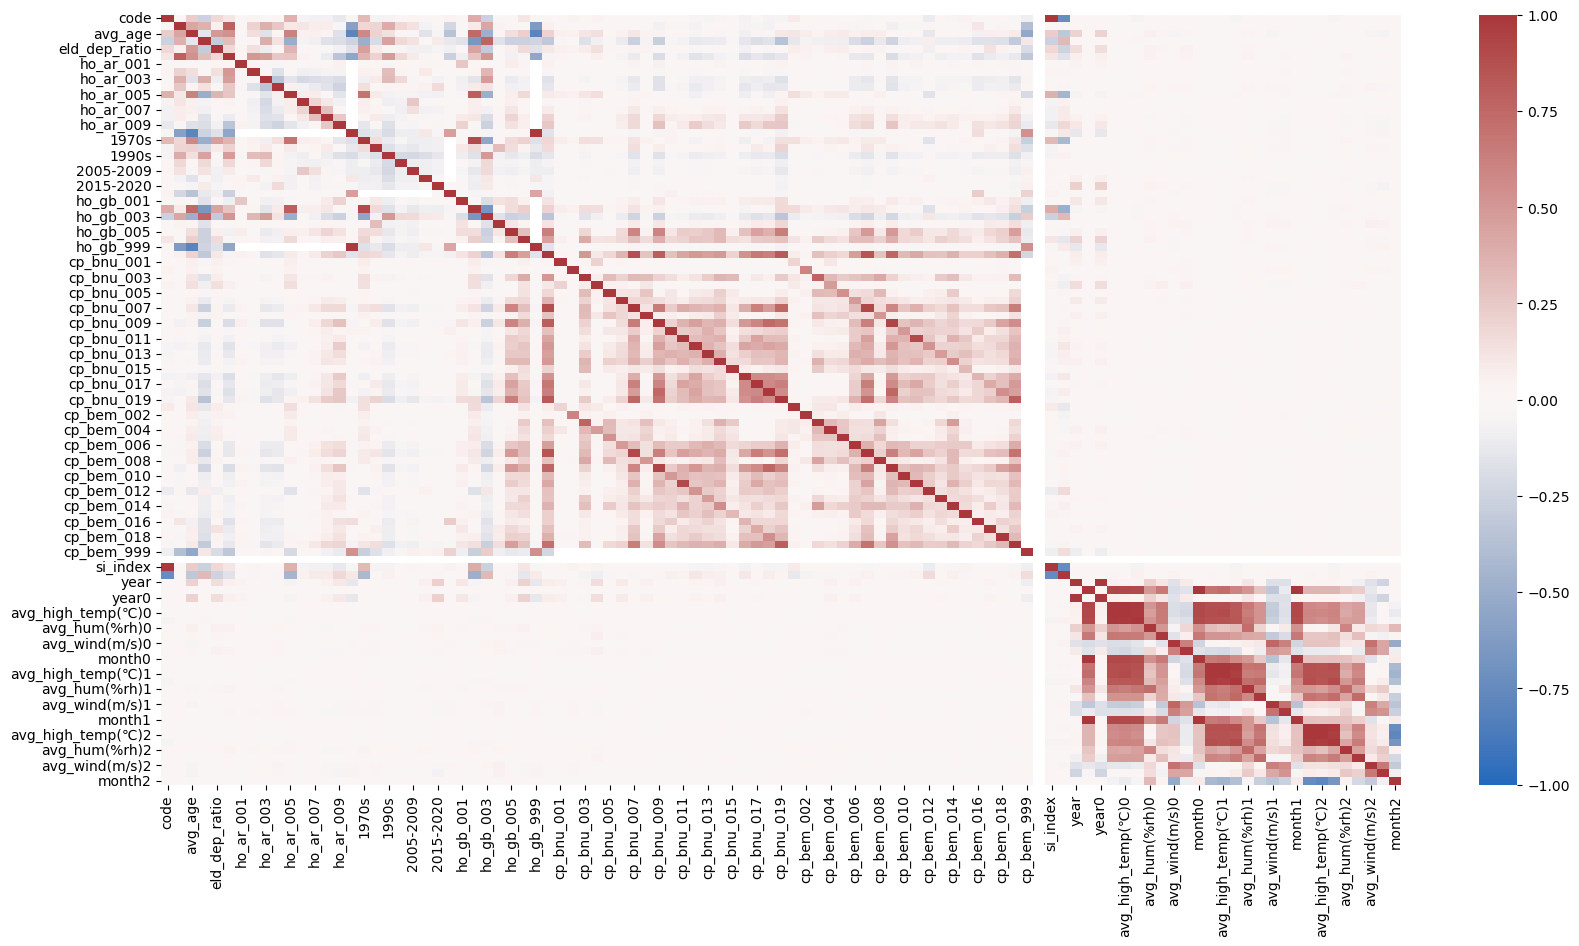

In [26]:
plt.figure(figsize=(20,10)) # 수치형 변수 Corr
sns.heatmap(sub.corr(),vmax=1,vmin=-1,annot=False,cmap='vlag')

### 지역에 따른 화재 발생 건수

In [27]:
reg_gr = pd.DataFrame(sub.groupby(['si_name']).fire_count.count()).reset_index()
reg_gr2 = pd.DataFrame(sub[sub.fire_count=='Y'].groupby(['si_name']).fire_count.count()).reset_index()
reg_gr3 = pd.DataFrame(sub[sub.fire_count=='N'].groupby(['si_name']).fire_count.count()).reset_index()
reg_gr = reg_gr.merge(reg_gr2, how='left',on='si_name')
reg_gr = reg_gr.merge(reg_gr3, how='left',on='si_name')
print(reg_gr)
reg_gr['fire_ratio'] = reg_gr['fire_count_y'] / (reg_gr['fire_count_y']+reg_gr['fire_count'])
reg_gr.drop(['fire_count_y','fire_count'],1,inplace=True)
reg_gr.rename(columns={'fire_count_x':'total_counts'},inplace=True)
reg_gr['fire_ratio'] = reg_gr['fire_ratio'].apply(lambda x : 0 if str(x) == 'nan' else x)
reg_gr = reg_gr.sort_values(by='fire_ratio',ascending=False)
reg_gr

   si_name  fire_count_x  fire_count_y  fire_count
0       고창          4320           644        3676
1       군산         22480          1240       21240
2       김제          6320           763        5557
3       남원          6280           751        5529
4       무주          1760           201        1559
5       부안          4680           608        4072
6       순창          2200           315        1885
7       완주          7480           570        6910
8       익산         23320          1310       22010
9       임실          2000           330        1670
10      장수          1680           252        1428
11      전주         54600          1970       52630
12      정읍          8680           972        7708
13      진안          1840           266        1574


/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/3764016254.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reg_gr.drop(['fire_count_y','fire_count'],1,inplace=True)


,si_name,total_counts,fire_ratio
9,임실,2000,0.165000
10,장수,1680,0.150000
0,고창,4320,0.149074
13,진안,1840,0.144565
6,순창,2200,0.143182
5,부안,4680,0.129915
2,김제,6320,0.120728
3,남원,6280,0.119586
4,무주,1760,0.114205
12,정읍,8680,0.111982


### 계절에 따른 화재 발생 건수

In [28]:
reg_gr = pd.DataFrame(sub.groupby(['season']).fire_count.count()).reset_index()
reg_gr2 = pd.DataFrame(sub[sub.fire_count=='Y'].groupby(['season']).fire_count.count()).reset_index()
reg_gr3 = pd.DataFrame(sub[sub.fire_count=='N'].groupby(['season']).fire_count.count()).reset_index()
reg_gr = reg_gr.merge(reg_gr2, how='left',on='season')
reg_gr = reg_gr.merge(reg_gr3, how='left',on='season')
print(reg_gr)
reg_gr['fire_ratio'] = reg_gr['fire_count_y'] / (reg_gr['fire_count_y']+reg_gr['fire_count'])
reg_gr.drop(['fire_count_y','fire_count'],1,inplace=True)
reg_gr.rename(columns={'fire_count_x':'total_counts'},inplace=True)
reg_gr['fire_ratio'] = reg_gr['fire_ratio'].apply(lambda x : 0 if str(x) == 'nan' else x)
reg_gr = reg_gr.sort_values(by='fire_ratio',ascending=False)
reg_gr

   season  fire_count_x  fire_count_y  fire_count
0       1         36910          2990       33920
1       2         36910          2583       34327
2       3         36910          2100       34810
3       4         36910          2519       34391


/var/folders/9x/c_4ws1p93b1977hdzjcvbdrm0000gn/T/ipykernel_59742/1963440592.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reg_gr.drop(['fire_count_y','fire_count'],1,inplace=True)


,season,total_counts,fire_ratio
0,1,36910,0.081008
1,2,36910,0.069981
3,4,36910,0.068247
2,3,36910,0.056895
